# **k-Means Clustering**    
Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-
means clustering, which is implemented in sklearn.cluster.KMeans .


# **Importing libraries**

In [30]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv('/content/Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [20]:
# Display a brief description of the overall dataset
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [22]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [54]:
df  = data.iloc[:,:-1]
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,2,3,12669,9656,7561,214,2674
1,2,3,7057,9810,9568,1762,3293
2,2,3,6353,8808,7684,2405,3516
3,1,3,13265,1196,4221,6404,507
4,2,3,22615,5410,7198,3915,1777
...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182
436,1,3,39228,1431,764,4510,93
437,2,3,14531,15488,30243,437,14841
438,1,3,10290,1981,2232,1038,168


# **Initializing KMean**

In [56]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)
kmeans.cluster_centers_.shape
kmeans

KMeans(n_clusters=2, random_state=42)

# **Finding Accuracy**

In [57]:
y_pred = kmeans.predict(df)
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = y_pred[mask]
acc = accuracy_score(y_pred, labels)
print("Acurracy : ",acc*100,"%")

Acurracy :  100.0 %


# **Show the best number in graph**

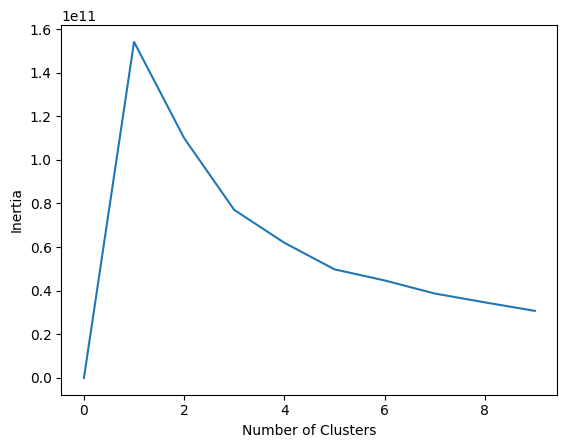

In [58]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# **k-Means for Color Compression**

One interesting application of clustering is in color compression within images (this example is adapted from Scikit-Learn's "Color Quantization
Using K-Means").       For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused,
and many of the pixels in the image will have similar or even identical colors.     
For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to
have the PIL Python package installed): (For a color version of this and following images, see the online version of this book).

# **Importing Libraries**

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [61]:
image = plt.imread("/content/Alstom-ELoco_7_credit_Alstom-scaled.jpg")

In [63]:
image.shape

(1920, 2560, 3)

In [64]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(4915200, 3)

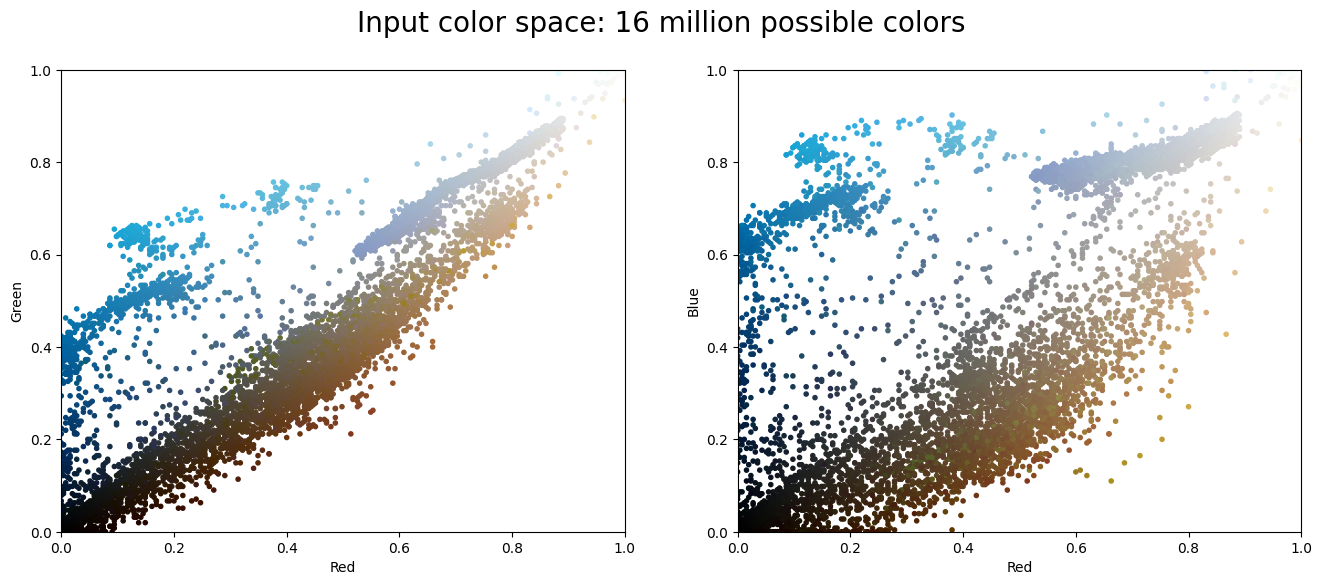

In [83]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data
  # choose a random subset
  rng = np.random.default_rng(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
  fig.suptitle(title, size=20);
plot_pixels(data, title='Input color space: 16 million possible colors')

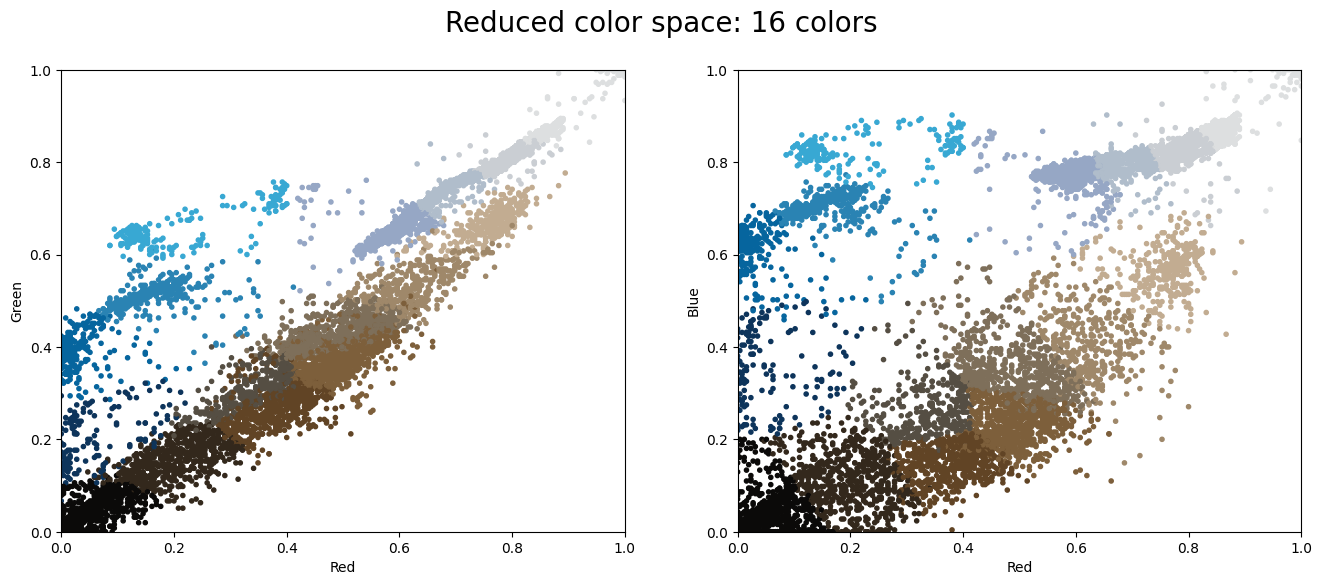

In [75]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
title="Reduced color space: 16 colors")

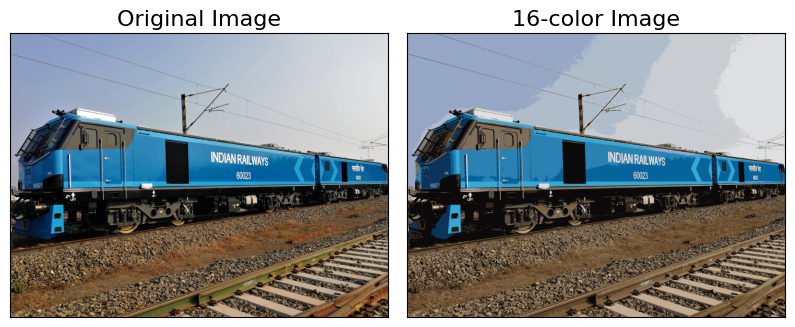

In [81]:
image_recolored = new_colors.reshape(image.shape)
fig, ax = plt.subplots(1, 2, figsize=(10,10),
subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16);